In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# קריאת הנתונים
df = pd.read_csv("flight_data_kiwi_02_03_25_clean.csv")

In [13]:
# ניקוי עמודת המחיר מהסימן "₪"
df['Price'] = df['Price'].replace({'₪': '', ',': ''}, regex=True).astype(float)

In [14]:
# תצוגה ראשונית של הנתונים
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91159 entries, 0 to 91158
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Snap Date      91159 non-null  object 
 1   Dep Date       91159 non-null  object 
 2   Return Date    91159 non-null  object 
 3   Outbound       91159 non-null  object 
 4   Dep Time       91159 non-null  object 
 5   Dep Duration   91159 non-null  object 
 6   Dep Arrival    91159 non-null  object 
 7   From           91159 non-null  object 
 8   Stops          91159 non-null  int64  
 9   Landing        91159 non-null  object 
 10  Inbound        91159 non-null  object 
 11  Back Time      91159 non-null  object 
 12  Back Duration  91159 non-null  object 
 13  Back Arrival   91159 non-null  object 
 14  From.1         91159 non-null  object 
 15  Stops.1        91159 non-null  int64  
 16  Landing.1      91159 non-null  object 
 17  Dep Company    91159 non-null  object 
 18  Back C

In [15]:
# טיפול בערכים חסרים
df.dropna(inplace=True)  # מחיקת שורות עם ערכים חסרים

In [16]:
# בדיקת outliers באמצעות Tukey method (1.5 * IQR)
def detect_outliers_tukey(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


In [17]:
# זיהוי ומחיקת outliers עבור מחירי טיסות
price_outliers = detect_outliers_tukey(df, 'Price')
df = df[~df.index.isin(price_outliers.index)]

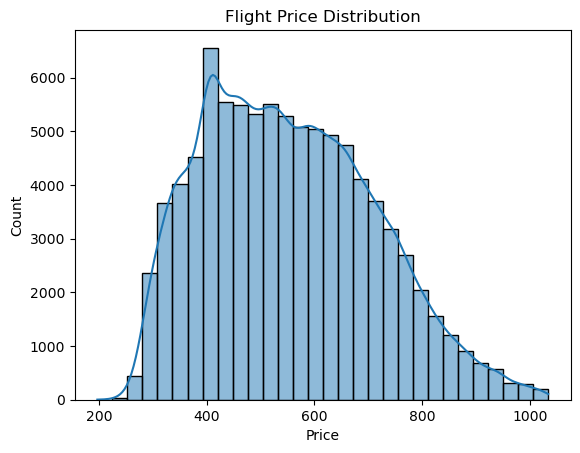

In [18]:
# ניתוח מחירים כלליים
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Flight Price Distribution")
plt.show()

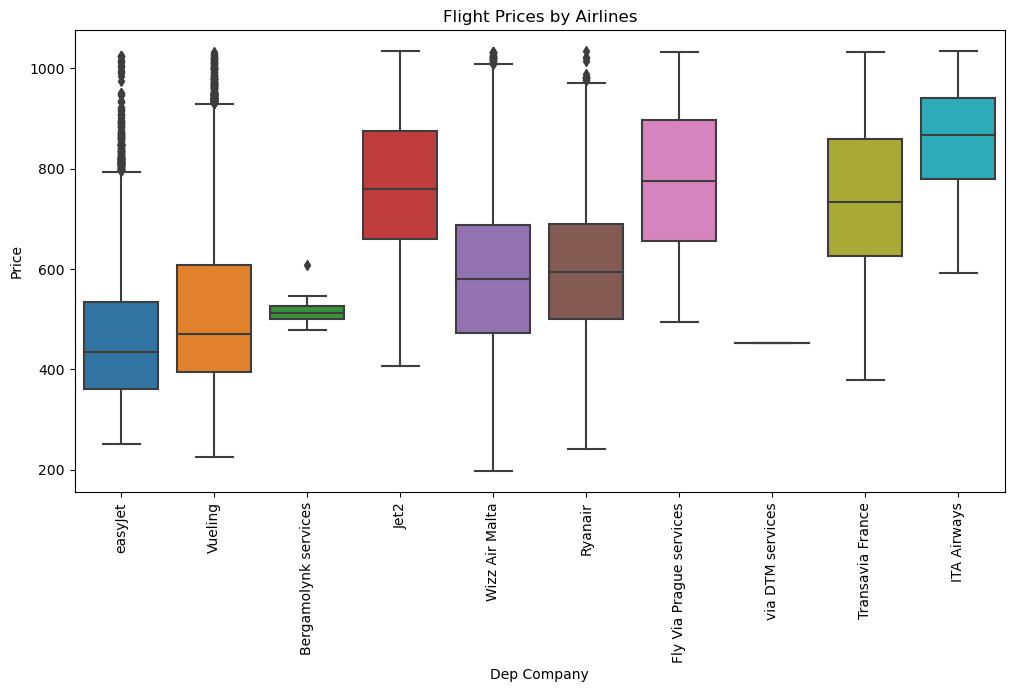

In [20]:
# מחירי טיסות לפי חברות תעופה
plt.figure(figsize=(12,6))
sns.boxplot(x='Dep Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Flight Prices by Airlines")
plt.show()

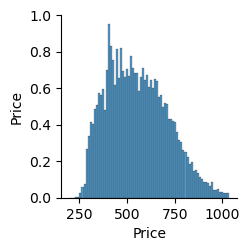

In [21]:
# חקירת תלות בין משתנים
sns.pairplot(df[['Price', 'Dep Time', 'Dep Arrival', 'Dep Duration']])
plt.show()

C:\Users\liort\AppData\Local\Temp\ipykernel_9060\2991858246.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


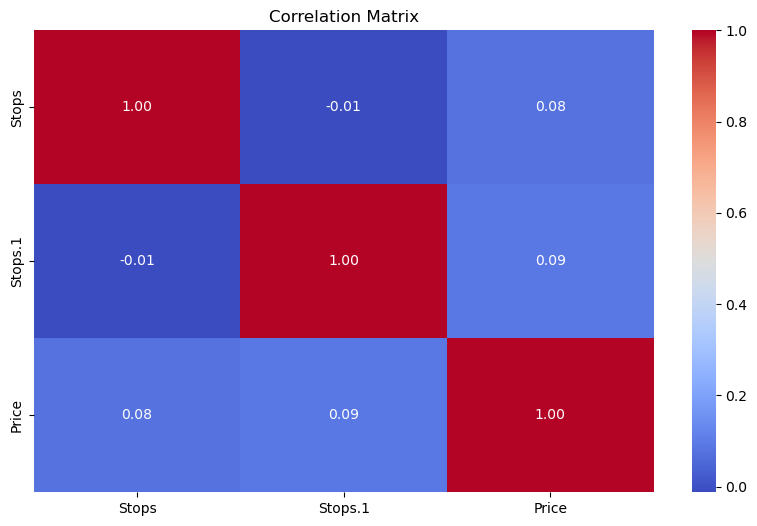

In [22]:
# מטריצת מתאמים בין משתנים מספריים
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# שמירת הנתונים לאחר עיבוד

df.to_csv('cleaned_file.csv', index=False)
print(f"Cleaned data saved to {cleaned_file.csv}")